<a href="https://colab.research.google.com/github/Neural-Energies/Portfolio/blob/main/EDA_Dashboard_Github_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Fetching**

In [1]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components
!pip install dash-table
!pip install jupyter-dash
!pip install pyngrok


from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Define the ticker symbol
ticker = "NQ=F"

# Define the period and interval
period = "2y"
interval = "60m"

# Fetch the data
data = yf.download(ticker, period=period, interval=interval)


<ipython-input-1-2a93842740c7>:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-2a93842740c7>:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
[*********************100%%**********************]  1 of 1 completed


# **Data Exploration**
The data for this analysis was collected using the yfinance library, which provides a simple interface to download historical market data. We specifically focused on the Nasdaq 100 Futures (ticker symbol: NQ=F) over a 2-year period with a 60-minute interval.

In [2]:
# Display the first few rows of the dataset
data.head()

# Display basic information about the dataset
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11442 entries, 2022-06-19 18:00:00 to 2024-06-18 15:00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11442 non-null  float64
 1   High       11442 non-null  float64
 2   Low        11442 non-null  float64
 3   Close      11442 non-null  float64
 4   Adj Close  11442 non-null  float64
 5   Volume     11442 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 625.7 KB


,Open,High,Low,Close,Adj Close,Volume
count,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000
mean,14513.268004,14536.223833,14489.439761,14513.977181,14513.977181,26737.593865
std,2491.213415,2488.701005,2493.671012,2491.498732,2491.498732,37115.638744
min,10542.000000,10629.750000,10484.750000,10543.000000,10543.000000,0.000000
25%,12149.562500,12175.187500,12123.125000,12149.750000,12149.750000,3800.000000
50%,14640.000000,14676.000000,14604.625000,14640.500000,14640.500000,8573.500000
75%,16549.687500,16562.750000,16529.500000,16549.875000,16549.875000,45286.000000
max,19966.250000,20001.000000,19950.500000,19967.000000,19967.000000,734348.000000


# **Features for EDA**
A variety of features were engineered to enrich the dataset. These features include:

Statistical measures such as mean, median, standard deviation, variance, percentiles, and quantiles.
Time-based features like daily range, hourly range, and rolling statistics.
Relative metrics such as relative volume and relative volatility.
Financial metrics including drawdown, maximum drawdown, cumulative return, and rolling return.
Anomalies and correlation measures.

#**Descriptive Statistics**
In this section, we calculate and display key descriptive statistics for the closing prices of Nasdaq 100 Futures. Descriptive statistics provide a summary of the central tendency, dispersion, and shape of a dataset’s distribution. These metrics are fundamental for understanding the basic characteristics of the data before diving into more complex analyses.

Calculations:
Mean: The average closing price over a 20-period window.
Median: The median closing price over a 20-period window, which is the middle value when the closing prices are ordered.
Standard Deviation: A measure of the amount of variation or dispersion of closing prices over a 20-period window.
Variance: The square of the standard deviation, indicating how much the closing prices deviate from the mean over a 20-period window.
Display:
The table shows the calculated statistics for the first 25 rows, where the rolling window starts producing values after the initial 20 periods.

In [3]:
# Mean, Median, Standard Deviation, Variance
data['Mean'] = data['Close'].rolling(window=20).mean()
data['Median'] = data['Close'].rolling(window=20).median()
data['Standard Deviation'] = data['Close'].rolling(window=20).std()
data['Variance'] = data['Close'].rolling(window=20).var()

# Display the first few rows of the data with the new features
print(data[['Mean', 'Median', 'Standard Deviation', 'Variance']].head(25))


                           Mean     Median  Standard Deviation      Variance
Datetime                                                                    
2022-06-19 18:00:00         NaN        NaN                 NaN           NaN
2022-06-19 19:00:00         NaN        NaN                 NaN           NaN
2022-06-19 20:00:00         NaN        NaN                 NaN           NaN
2022-06-19 21:00:00         NaN        NaN                 NaN           NaN
2022-06-19 22:00:00         NaN        NaN                 NaN           NaN
2022-06-19 23:00:00         NaN        NaN                 NaN           NaN
2022-06-21 00:00:00         NaN        NaN                 NaN           NaN
2022-06-21 01:00:00         NaN        NaN                 NaN           NaN
2022-06-21 02:00:00         NaN        NaN                 NaN           NaN
2022-06-21 03:00:00         NaN        NaN                 NaN           NaN
2022-06-21 04:00:00         NaN        NaN                 NaN           NaN

# **Percentiles and Quantiles**

Percentiles and quantiles are used to understand the distribution of data. They help in identifying the spread and skewness of the dataset by showing the values below which a given percentage of observations fall.

**Calculations**:

Percentile 10: The value below which 10% of the closing prices fall.
Percentile 25: The value below which 25% of the closing prices fall.
Percentile 50: The median value, below which 50% of the closing prices fall.
Percentile 75: The value below which 75% of the closing prices fall.
Percentile 90: The value below which 90% of the closing prices fall.
Quantile 10: Similar to percentiles, quantiles divide the dataset into intervals. Here, the 10th quantile is calculated.
Quantile 25: The 25th quantile, showing the value below which 25% of the observations fall.

**Display:**

The table shows the calculated percentiles and quantiles for the first 25 rows, providing insight into the distribution and spread of the closing prices over time.

In [4]:
# Percentiles and Quantiles
data['Percentile_10'] = data['Close'].rolling(window=20).apply(lambda x: np.percentile(x, 10))
data['Percentile_25'] = data['Close'].rolling(window=20).apply(lambda x: np.percentile(x, 25))
data['Percentile_50'] = data['Close'].rolling(window=20).apply(lambda x: np.percentile(x, 50))
data['Percentile_75'] = data['Close'].rolling(window=20).apply(lambda x: np.percentile(x, 75))
data['Percentile_90'] = data['Close'].rolling(window=20).apply(lambda x: np.percentile(x, 90))
data['Quantile_10'] = data['Close'].rolling(window=20).quantile(0.10)
data['Quantile_25'] = data['Close'].rolling(window=20).quantile(0.25)
data['Quantile_50'] = data['Close'].rolling(window=20).quantile(0.50)
data['Quantile_75'] = data['Close'].rolling(window=20).quantile(0.75)
data['Quantile_90'] = data['Close'].rolling(window=20).quantile(0.90)

# Display the first few rows of the data with the new features
print(data[['Percentile_10', 'Percentile_25', 'Percentile_50', 'Percentile_75', 'Percentile_90',
           'Quantile_10', 'Quantile_25', 'Quantile_50', 'Quantile_75', 'Quantile_90']].head(25))


                     Percentile_10  Percentile_25  Percentile_50  \
Datetime                                                           
2022-06-19 18:00:00            NaN            NaN            NaN   
2022-06-19 19:00:00            NaN            NaN            NaN   
2022-06-19 20:00:00            NaN            NaN            NaN   
2022-06-19 21:00:00            NaN            NaN            NaN   
2022-06-19 22:00:00            NaN            NaN            NaN   
2022-06-19 23:00:00            NaN            NaN            NaN   
2022-06-21 00:00:00            NaN            NaN            NaN   
2022-06-21 01:00:00            NaN            NaN            NaN   
2022-06-21 02:00:00            NaN            NaN            NaN   
2022-06-21 03:00:00            NaN            NaN            NaN   
2022-06-21 04:00:00            NaN            NaN            NaN   
2022-06-21 05:00:00            NaN            NaN            NaN   
2022-06-21 06:00:00            NaN            Na

# **Range and Realtive Features**
Range and relative features provide insights into the volatility and trading volume relative to past periods. These metrics help identify periods of high or low activity in the market.

**Calculations:**

Daily Range: The difference between the highest and lowest prices in a day.
Hourly Range: The difference between consecutive closing prices on an hourly basis.
Relative Volume: The trading volume relative to its average over a specified window.
Relative Volatility: The standard deviation of closing prices relative to their mean over a specified window.

**Display:**

The table shows the calculated range and relative features for the first 25 rows, providing insights into the market's activity and volatility over time.

In [5]:
# Daily Range, Hourly Range, Relative Volume, Relative Volatility
data['Daily Range'] = data['High'] - data['Low']
data['Hourly Range'] = data['Close'].diff()
data['Relative Volume'] = data['Volume'] / data['Volume'].rolling(window=20).mean()
data['Relative Volatility'] = data['Close'].rolling(window=20).std() / data['Close'].mean()

# Display the first few rows of the data with the new features
print(data[['Daily Range', 'Hourly Range', 'Relative Volume', 'Relative Volatility']].head(25))


                     Daily Range  Hourly Range  Relative Volume  \
Datetime                                                          
2022-06-19 18:00:00       108.75           NaN              NaN   
2022-06-19 19:00:00        45.25         11.50              NaN   
2022-06-19 20:00:00        88.50        -80.25              NaN   
2022-06-19 21:00:00        97.25        -49.75              NaN   
2022-06-19 22:00:00        62.25         52.50              NaN   
2022-06-19 23:00:00        43.00         18.00              NaN   
2022-06-21 00:00:00        14.25        121.50              NaN   
2022-06-21 01:00:00        39.25        -23.00              NaN   
2022-06-21 02:00:00        50.50        -14.50              NaN   
2022-06-21 03:00:00        92.50         65.25              NaN   
2022-06-21 04:00:00        35.75         14.25              NaN   
2022-06-21 05:00:00        42.00        -29.00              NaN   
2022-06-21 06:00:00        24.50          3.25              Na

# **Z-Score and Percent Change Features**

Z-Score and percent change features help in understanding the standardization of prices and their relative changes over time. These features are crucial for identifying anomalies and trends.

**Calculations:**

Z-Score: The number of standard deviations a data point is from the mean.
Percent Change: The percentage change in closing prices from one period to the next.
Mean Percent Change: The average percentage change in closing prices over a specified window.

**Display:**

The table shows the calculated Z-Score and percent change features for the first 25 rows, helping to identify trends and anomalies in the market.

In [6]:
# Z-Score, Percent Change, Mean Percent Change
#data['Z-Score'] = zscore(data['Close'].dropna())
data['Pct Change'] = data['Close'].pct_change()
data['Mean Pct Change'] = data['Pct Change'].rolling(window=20).mean()





# **Rolling Statistics**
Rolling statistics provide moving averages and other statistical measures over a specified window. These features help smooth out short-term fluctuations and highlight longer-term trends.

**Calculations:**

Rolling Max: The maximum closing price over a rolling window.
Rolling Min: The minimum closing price over a rolling window.
Rolling Range: The range of closing prices over a rolling window.
Rolling Median: The median closing price over a rolling window.
Rolling IQR: The interquartile range of closing prices over a rolling window.

**Display:**

The table shows the calculated rolling statistics for the first 25 rows, highlighting the longer-term trends and variations in the market.

In [7]:
# Rolling Max, Rolling Min, Rolling Range, Rolling Median, Rolling IQR
data['Rolling Max'] = data['Close'].rolling(window=20).max()
data['Rolling Min'] = data['Close'].rolling(window=20).min()
data['Rolling Range'] = data['Rolling Max'] - data['Rolling Min']
data['Rolling Median'] = data['Close'].rolling(window=20).median()
data['Rolling IQR'] = data['Close'].rolling(window=20).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# Display the first few rows of the data with the new features
print(data[['Rolling Max', 'Rolling Min', 'Rolling Range', 'Rolling Median', 'Rolling IQR']].head(25))


                     Rolling Max  Rolling Min  Rolling Range  Rolling Median  \
Datetime                                                                       
2022-06-19 18:00:00          NaN          NaN            NaN             NaN   
2022-06-19 19:00:00          NaN          NaN            NaN             NaN   
2022-06-19 20:00:00          NaN          NaN            NaN             NaN   
2022-06-19 21:00:00          NaN          NaN            NaN             NaN   
2022-06-19 22:00:00          NaN          NaN            NaN             NaN   
2022-06-19 23:00:00          NaN          NaN            NaN             NaN   
2022-06-21 00:00:00          NaN          NaN            NaN             NaN   
2022-06-21 01:00:00          NaN          NaN            NaN             NaN   
2022-06-21 02:00:00          NaN          NaN            NaN             NaN   
2022-06-21 03:00:00          NaN          NaN            NaN             NaN   
2022-06-21 04:00:00          NaN        

# **Drawdown and Return Features**
Drawdown and return features measure the decline from a peak and the overall return over time. These metrics are essential for understanding the risk and performance of the market.

**Calculations:**

Drawdown: The decline in closing prices from the highest point reached.
Maximum Drawdown: The maximum observed drawdown over a specified window.
Cumulative Return: The cumulative return calculated by compounding the percentage changes over time.
Rolling Return: The sum of percentage changes over a rolling window.

**Display:**
The table shows the calculated drawdown and return features for the first 25 rows, providing insights into the market's performance and risk.

In [8]:
# Drawdown, Maximum Drawdown, Cumulative Return, Rolling Return
data['Drawdown'] = data['Close'] / data['Close'].cummax() - 1
data['Maximum Drawdown'] = data['Drawdown'].rolling(window=20).min()
data['Cumulative Return'] = (1 + data['Pct Change']).cumprod() - 1
data['Rolling Return'] = data['Pct Change'].rolling(window=20).sum()

# Display the first few rows of the data with the new features
print(data[['Drawdown', 'Maximum Drawdown', 'Cumulative Return', 'Rolling Return']].head(25))


                     Drawdown  Maximum Drawdown  Cumulative Return  \
Datetime                                                             
2022-06-19 18:00:00  0.000000               NaN                NaN   
2022-06-19 19:00:00  0.000000               NaN           0.001007   
2022-06-19 20:00:00 -0.007021               NaN          -0.006021   
2022-06-19 21:00:00 -0.011374               NaN          -0.010378   
2022-06-19 22:00:00 -0.006781               NaN          -0.005780   
2022-06-19 23:00:00 -0.005206               NaN          -0.004204   
2022-06-21 00:00:00  0.000000               NaN           0.006437   
2022-06-21 01:00:00 -0.002001               NaN           0.004423   
2022-06-21 02:00:00 -0.003263               NaN           0.003153   
2022-06-21 03:00:00  0.000000               NaN           0.008867   
2022-06-21 04:00:00  0.000000               NaN           0.010115   
2022-06-21 05:00:00 -0.002514               NaN           0.007576   
2022-06-21 06:00:00 

# **Entropy and Risk Metrics**

Entropy and risk metrics provide measures of uncertainty and risk in the market. These metrics help in assessing the stability and predictability of the market.

**Calculations**:

Entropy: A measure of uncertainty in the closing prices.
Sharpe Ratio: The average return earned in excess of the risk-free rate per unit of volatility.
Sortino Ratio: A variation of the Sharpe ratio that only penalizes downside volatility.

**Display**:

The table shows the calculated entropy and risk metrics for the first 25 rows, providing insights into the market's stability and risk-adjusted performance.

In [9]:
# Entropy, Sharpe Ratio, Sortino Ratio
data['Entropy'] = data['Close'].rolling(window=20).apply(lambda x: -np.sum(np.log2(x / x.sum()) * (x / x.sum())))
data['Sharpe Ratio'] = data['Rolling Return'] / data['Standard Deviation']
data['Sortino Ratio'] = data['Rolling Return'] / data['Drawdown']

# Display the first few rows of the data with the new features
print(data[['Entropy', 'Sharpe Ratio', 'Sortino Ratio']].head(25))


                      Entropy  Sharpe Ratio  Sortino Ratio
Datetime                                                  
2022-06-19 18:00:00       NaN           NaN            NaN
2022-06-19 19:00:00       NaN           NaN            NaN
2022-06-19 20:00:00       NaN           NaN            NaN
2022-06-19 21:00:00       NaN           NaN            NaN
2022-06-19 22:00:00       NaN           NaN            NaN
2022-06-19 23:00:00       NaN           NaN            NaN
2022-06-21 00:00:00       NaN           NaN            NaN
2022-06-21 01:00:00       NaN           NaN            NaN
2022-06-21 02:00:00       NaN           NaN            NaN
2022-06-21 03:00:00       NaN           NaN            NaN
2022-06-21 04:00:00       NaN           NaN            NaN
2022-06-21 05:00:00       NaN           NaN            NaN
2022-06-21 06:00:00       NaN           NaN            NaN
2022-06-21 07:00:00       NaN           NaN            NaN
2022-06-21 08:00:00       NaN           NaN            N

# **Kurtosis**
Kurtosis measures the tails of the distribution of closing prices, indicating the presence of outliers and extreme values.

**Calculations**:

Rolling Kurtosis: The kurtosis of closing prices over a rolling window.

**Display**:

The table shows the calculated rolling kurtosis for the first 25 rows, highlighting the presence of outliers and extreme values in the market.

In [10]:
# Additional statistical measures
data['Rolling Skewness'] = data['Close'].rolling(window=20).skew()
data['Rolling Kurtosis'] = data['Close'].rolling(window=20).kurt()
data['Autocorrelation'] = data['Close'].rolling(window=20).apply(lambda x: x.autocorr(), raw=False)
data['Partial Autocorrelation'] = data['Close'].rolling(window=20).apply(lambda x: pd.Series(x).autocorr(lag=1), raw=False)

# Display the first few rows of the data with the new features
print(data[['Rolling Skewness', 'Rolling Kurtosis', 'Autocorrelation', 'Partial Autocorrelation']].head(25))


                     Rolling Skewness  Rolling Kurtosis  Autocorrelation  \
Datetime                                                                   
2022-06-19 18:00:00               NaN               NaN              NaN   
2022-06-19 19:00:00               NaN               NaN              NaN   
2022-06-19 20:00:00               NaN               NaN              NaN   
2022-06-19 21:00:00               NaN               NaN              NaN   
2022-06-19 22:00:00               NaN               NaN              NaN   
2022-06-19 23:00:00               NaN               NaN              NaN   
2022-06-21 00:00:00               NaN               NaN              NaN   
2022-06-21 01:00:00               NaN               NaN              NaN   
2022-06-21 02:00:00               NaN               NaN              NaN   
2022-06-21 03:00:00               NaN               NaN              NaN   
2022-06-21 04:00:00               NaN               NaN              NaN   
2022-06-21 0

**Conclusion**

By calculating and displaying these range, relative, statistical, drawdown, return, entropy, risk, and kurtosis features, we gain a comprehensive understanding of the market's behavior. These foundational analyses are crucial for any further statistical modeling or machine learning tasks, ensuring that we are working with well-understood data.

# **Data Cleaning**
To ensure the integrity of the dataset, any rows with missing or infinite values were handled appropriately. This step is crucial for accurate analysis and modeling.

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# If there are missing values, handle them (e.g., forward fill)
data.ffill(inplace=True)


Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Mean                       19
Median                     19
Standard Deviation         19
Variance                   19
Percentile_10              19
Percentile_25              19
Percentile_50              19
Percentile_75              19
Percentile_90              19
Quantile_10                19
Quantile_25                19
Quantile_50                19
Quantile_75                19
Quantile_90                19
Daily Range                 0
Hourly Range                1
Relative Volume            19
Relative Volatility        19
Pct Change                  1
Mean Pct Change            20
Rolling Max                19
Rolling Min                19
Rolling Range              19
Rolling Median             19
Rolling IQR                19
Drawdown                    0
Maximum Drawdown           19
Cumulative

# **Exploratory Data Analysis**

# **Nasdaq 100 Futures Closing Prices**

The plot illustrates the closing prices of Nasdaq 100 Futures over a 2-year period, captured at 60-minute intervals. This visualization provides an overview of the market's performance, highlighting trends, patterns, and potential periods of volatility.

Key Observations:

**Trend Analysis:**

The plot reveals the overall upward trend in the Nasdaq 100 Futures closing prices, indicating a bullish market over the observed period.
Periods of corrections and consolidations can be seen, where the price temporarily decreases or stabilizes before continuing its upward trajectory.
Volatility:

The fluctuations in the plot suggest periods of high volatility, where prices experience rapid changes.
Identifying these periods can be crucial for traders and analysts to understand market dynamics and potential risks.
Significant Peaks and Troughs:

The plot shows several peaks and troughs, reflecting the market's response to various economic events and news.
These points can be used to identify resistance and support levels, which are essential for technical analysis.

**Conclusion**

This plot serves as a foundational visualization for further analysis. By examining the closing prices over time, analysts can gain insights into market behavior, identify trends, and make informed decisions based on historical data.

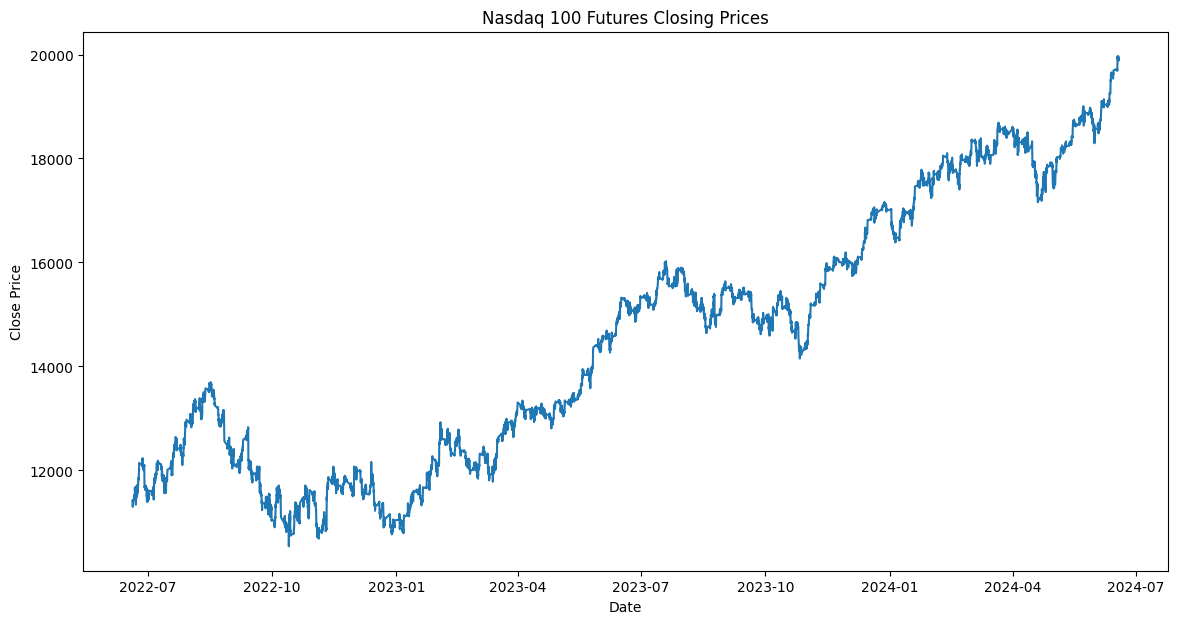

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'])
plt.title('Nasdaq 100 Futures Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#Plotty
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Close Price'
))

fig.update_layout(
    title='Nasdaq 100 Futures Closing Prices',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_dark'
)

fig.show()


# **Distribution of Nasdaq 100 Futures Closing Prices**
This histogram, overlaid with a Kernel Density Estimate (KDE) plot, illustrates the distribution of Nasdaq 100 Futures closing prices over a 2-year period. The histogram displays the frequency of closing prices within specific ranges, while the KDE plot provides a smoothed estimate of the distribution.

Key Observations:

**Multi-modal Distribution**:

The histogram shows multiple peaks, indicating that the closing prices are not normally distributed but instead exhibit a multi-modal distribution.
These peaks correspond to price levels where the market spent a significant amount of time, indicating areas of support and resistance.

**Frequency of Price Levels**:

The height of each bar represents the frequency of closing prices within that price range.
Higher bars indicate price ranges where closing prices frequently occurred, suggesting these levels were commonly traded.

**Volatility and Price Clusters:**

The spread of the bars and the width of the distribution provide insights into market volatility.
Wider distributions suggest higher volatility, with prices fluctuating across a broader range.

**Kernel Density Estimate (KDE) Plot:**

The KDE plot provides a smoothed version of the histogram, offering a clearer view of the underlying distribution.
Peaks in the KDE plot correspond to common price levels, reinforcing the observations from the histogram.

**Conclusion:**

This distribution analysis reveals that the Nasdaq 100 Futures closing prices exhibit a multi-modal distribution, with several distinct price levels where the market frequently closed. These levels can be crucial for identifying support and resistance zones and understanding the market's trading behavior over the analyzed period.

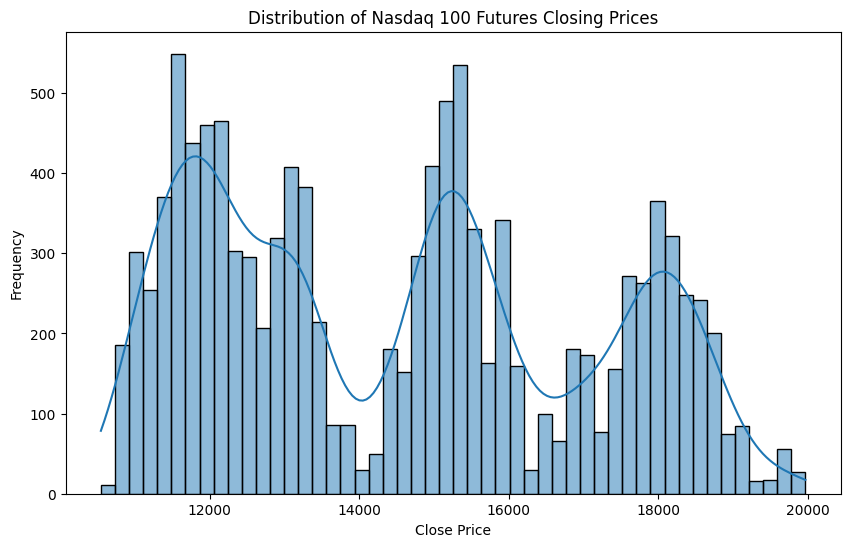

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=50, kde=True)
plt.title('Distribution of Nasdaq 100 Futures Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()
#Plotty
fig = px.histogram(data, x='Close', nbins=50, title='Distribution of Nasdaq 100 Futures Closing Prices', template='plotly_dark')

fig.update_layout(
    xaxis_title='Close Price',
    yaxis_title='Frequency'
)

fig.show()


# **Nasdaq 100 Futures Closing Prices and Moving Averages**
This plot illustrates the closing prices of Nasdaq 100 Futures over a 2-year period, along with the 50-period and 200-period moving averages. Moving averages are a widely used indicator in technical analysis to smooth out price data and identify trends.

**Key Observations:**

**Closing Prices:**

The blue line represents the closing prices of Nasdaq 100 Futures. It shows the actual prices at the end of each 60-minute interval over the 2-year period.
The plot reveals the overall upward trend in the closing prices, indicating a bullish market.

**50-Period Moving Average (MA):**

The orange line represents the 50-period moving average. This is calculated by taking the average of the closing prices over the past 50 periods (60-minute intervals).
The 50-period MA is more responsive to recent price changes and can be used to identify short to medium-term trends

**200-Period Moving Average (MA):**

The green line represents the 200-period moving average. This is calculated by taking the average of the closing prices over the past 200 periods.
The 200-period MA is less responsive to recent price changes and is used to identify long-term trends.

**Moving Average Crossovers:**

Crossovers between the 50-period and 200-period MAs can signal potential changes in trend direction.
A golden cross occurs when the 50-period MA crosses above the 200-period MA, suggesting a potential upward trend.
A death cross occurs when the 50-period MA crosses below the 200-period MA, suggesting a potential downward trend.

**Conclusion**

The plot of Nasdaq 100 Futures closing prices along with the 50-period and 200-period moving averages provides valuable insights into the market's trends and potential turning points. The moving averages help smooth out the price data, making it easier to identify underlying trends and potential trading signals.

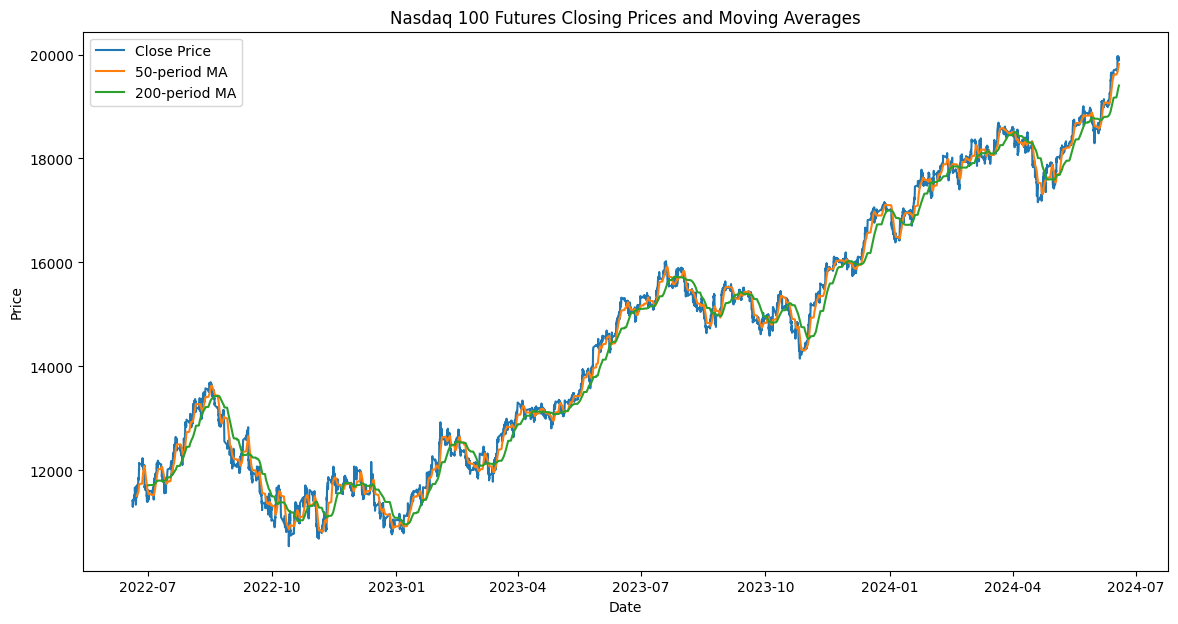

In [14]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['MA50'], label='50-period MA')
plt.plot(data.index, data['MA200'], label='200-period MA')
plt.title('Nasdaq 100 Futures Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
#Plotty
# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Identify crossover points
data['Crossover'] = data['MA50'] > data['MA200']
data['Crossover_Shift'] = data['Crossover'].shift(1)

# Points where crossover occurs
cross_points = data[(data['Crossover'] != data['Crossover_Shift']) & (data['Crossover'].notnull())]

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Close Price'
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['MA50'],
    mode='lines',
    name='50-period MA'
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['MA200'],
    mode='lines',
    name='200-period MA'
))

# Add markers for crossover points
fig.add_trace(go.Scatter(
    x=cross_points.index,
    y=cross_points['Close'],
    mode='markers',
    marker=dict(color='magenta', size=10, symbol='cross'),
    name='Crossover Points'
))

fig.update_layout(
    title='Nasdaq 100 Futures Closing Prices and Moving Averages with Crossovers',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark'
)

fig.show()

# ***Generate Trading Signals (50 cross 200 from below, buy: 50 cross 200 from above, exit)***

In this section, we calculate the 50-period and 200-period moving averages of the Nasdaq 100 Futures closing prices. We then generate trading signals based on the crossovers of these moving averages. Specifically, we generate a buy signal when the 50-period moving average (MA50) crosses above the 200-period moving average (MA200) and an exit signal when the MA50 crosses below the MA200. These signals help in identifying potential entry and exit points for trading.

In [ ]:
# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Generate signals
data['Signal'] = 0
data.iloc[50:, data.columns.get_loc('Signal')] = np.where(data['MA50'].iloc[50:] > data['MA200'].iloc[50:], 1, 0)  # Long signal
data['Position'] = data['Signal'].diff()  # Signal change

# Long entry (1), Long exit (-1)
data['Long Entry'] = np.where(data['Position'] == 1, 1, 0)
data['Long Exit'] = np.where(data['Position'] == -1, 1, 0)

# Print the first few rows to check the results
print(data.head(60))


                         Open      High       Low     Close  Adj Close  \
Datetime                                                                 
2022-06-19 18:00:00  11332.50  11422.25  11313.50  11418.25   11418.25   
2022-06-19 19:00:00  11417.75  11437.50  11392.25  11429.75   11429.75   
2022-06-19 20:00:00  11428.00  11432.75  11344.25  11349.50   11349.50   
2022-06-19 21:00:00  11350.00  11371.00  11273.75  11299.75   11299.75   
2022-06-19 22:00:00  11301.25  11359.25  11297.00  11352.25   11352.25   
2022-06-19 23:00:00  11352.25  11388.50  11345.50  11370.25   11370.25   
2022-06-21 00:00:00  11487.00  11494.50  11480.25  11491.75   11491.75   
2022-06-21 01:00:00  11491.75  11498.00  11458.75  11468.75   11468.75   
2022-06-21 02:00:00  11468.75  11481.75  11431.25  11454.25   11454.25   
2022-06-21 03:00:00  11454.25  11542.00  11449.50  11519.50   11519.50   
2022-06-21 04:00:00  11519.00  11547.00  11511.25  11533.75   11533.75   
2022-06-21 05:00:00  11534.50  11539.5

***Calculate PnL and Performance Metrics***

In [ ]:
# Calculate returns
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Signal'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

# Calculate PnL
data['PnL'] = data['Cumulative Strategy Return'] - 1

# Calculate Sharpe Ratio
sharpe_ratio = (data['Strategy Return'].mean() / data['Strategy Return'].std()) * np.sqrt(252 * 7 * 24 / 60)  # Annualized

# Additional Trading Metrics
# Calculate PnL
data['PnL'] = data['Cumulative Strategy Return'] - 1

# Calculate Sharpe Ratio
sharpe_ratio = (data['Strategy Return'].mean() / data['Strategy Return'].std()) * np.sqrt(252 * 7 * 24 / 60)  # Annualized

# Additional Trading Metrics
total_pnl_percentage = (data['Cumulative Strategy Return'].iloc[-1] - 1) * 100
num_signals = data['Long Entry'].sum() + data['Long Exit'].sum()
market_return_percentage = (data['Cumulative Market Return'].iloc[-1] - 1) * 100


***Plot Signal***

In [17]:
# Plot Results
fig = go.Figure()

# Plot cumulative returns
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Cumulative Market Return'],
    mode='lines',
    name='Market Return'
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Cumulative Strategy Return'],
    mode='lines',
    name='Strategy Return'
))

# Add markers for long entries and exits
fig.add_trace(go.Scatter(
    x=data[data['Long Entry'] == 1].index,
    y=data['Cumulative Strategy Return'][data['Long Entry'] == 1],
    mode='markers',
    marker=dict(color='green', size=10, symbol='triangle-up'),
    name='Long Entry'
))

fig.add_trace(go.Scatter(
    x=data[data['Long Exit'] == 1].index,
    y=data['Cumulative Strategy Return'][data['Long Exit'] == 1],
    mode='markers',
    marker=dict(color='red', size=10, symbol='triangle-down'),
    name='Long Exit'
))

fig.update_layout(
    title=f'Nasdaq 100 Futures Strategy Performance (Sharpe Ratio: {sharpe_ratio:.2f})',
    xaxis_title='Date',
    yaxis_title='Cumulative Returns',
    template='plotly_dark'
)

fig.show()


print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Number of Signals: {num_signals}")


Sharpe Ratio: 0.25
Number of Signals: 75


# ***Correlation Heatmap of Nasdaq 100 Futures Features***
This correlation heatmap illustrates the relationships between various features of the Nasdaq 100 Futures dataset. The heatmap provides a visual representation of the correlation coefficients between pairs of features, with colors indicating the strength and direction of the correlation.

**Key Observations:**

**Positive Correlations:**

Features with correlation coefficients close to 1 are strongly positively correlated, meaning they tend to increase together.
For example, features like Open, High, Low, and Close prices exhibit high positive correlations, as expected in financial time series data.

**Negative Correlations:**

Features with correlation coefficients close to -1 are strongly negatively correlated, meaning one feature tends to decrease when the other increases.
Negative correlations can be seen in specific pairs, though they are less common in this dataset.

**No Correlation:**

Features with correlation coefficients close to 0 have no linear relationship, indicating that changes in one feature do not predict changes in the other.
Several features show minimal or no correlation with others, highlighting their unique contributions to the dataset.

**Feature Clusters:**

Clusters of features with similar correlation patterns can be identified, indicating groups of features that behave similarly.
For example, features related to volatility and moving averages show distinct clusters.

**Interpretation:**

**High Positive Correlations:**
Useful for identifying redundant features that provide similar information.

High Negative Correlations: Important for identifying potential hedging opportunities or risk management strategies.

**No Correlation:**
Indicates features that may add unique and valuable information for modeling and analysis.

**Conclusion**
The correlation heatmap provides a comprehensive overview of the relationships between different features in the Nasdaq 100 Futures dataset. This visualization aids in feature selection, dimensionality reduction, and understanding the underlying structure of the data, which are critical steps in building robust trading strategies and financial models.

In [18]:
import plotly.express as px
import numpy as np

# Compute the correlation matrix
corr = data.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Masked correlation matrix
corr_masked = corr.mask(mask)

# Create the heatmap with the masked correlation matrix
heatmap_fig = px.imshow(corr_masked,
                        color_continuous_scale='Viridis',
                        title='Correlation Heatmap',
                        template='plotly_dark',
                        aspect="auto")

heatmap_fig.update_layout(
    title={
        'text': "Correlation Heatmap",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=2000,
    height=1000,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

heatmap_fig.show()


# **Interactive Dash Board**

This interactive dashboard provides a comprehensive and dynamic view of the Nasdaq 100 Futures dataset. By leveraging the power of Plotly and Dash, the dashboard allows users to explore various features and metrics, facilitating a deeper understanding of the market trends and relationships.

**Key Components:**

**Dropdown Menu for Feature Selection:**

Users can select different features from a dropdown menu to visualize their trends over time.
This functionality allows for the examination of specific metrics, such as moving averages, percent changes, and volatility indicators, individually.

**Time Series Plots:**

The dashboard includes time series plots that display the selected feature over the specified period.
Users can interact with the plots by zooming in, zooming out, and hovering over data points to get detailed information.

**Correlation Heatmap:**

An interactive correlation heatmap is available to visualize the relationships between various features in the dataset.
Users can hover over the heatmap to see the exact correlation values, helping to identify strong positive or negative correlations.

**Trading Signals:**

The dashboard highlights trading signals based on moving average crossovers.
Long entries and exits are marked on the time series plots, providing a clear view of potential trading opportunities.

**Statistical Summaries:**

Users can view statistical summaries, including descriptive statistics and rolling statistics, to gain insights into the data distribution and trends.
Metrics such as mean, median, standard deviation, and rolling averages are dynamically updated based on user interactions.
Benefits:

**Interactive Exploration: **
The dashboard's interactive elements enable users to explore the dataset dynamically, providing a hands-on approach to data analysis.
Real-time Insights: Users can gain real-time insights into the market trends and relationships between different features, aiding in better decision-making.
Customizable Views: The ability to select different features and adjust the time frame allows for customizable views, catering to the specific needs of different users.

**Conclusion:**
The interactive dashboard for Nasdaq 100 Futures analysis is a powerful tool that combines visualization and interactivity to enhance the user experience. By providing a dynamic platform for exploring market data, the dashboard helps users gain a deeper understanding of the market's behavior and identify potential trading opportunities. This tool is essential for traders, analysts, and anyone interested in financial data analysis.

In [19]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Define a list of colors for different features
colors = px.colors.qualitative.Plotly

# Layout of the app
app.layout = html.Div([
    html.H1("Nasdaq 100 Futures EDA Dashboard"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'Mean', 'value': 'Mean'},
            {'label': 'Median', 'value': 'Median'},
            {'label': 'Standard Deviation', 'value': 'Standard Deviation'},
            {'label': 'Variance', 'value': 'Variance'},
            {'label': 'Percentile 10', 'value': 'Percentile_10'},
            {'label': 'Percentile 25', 'value': 'Percentile_25'},
            {'label': 'Percentile 50', 'value': 'Percentile_50'},
            {'label': 'Percentile 75', 'value': 'Percentile_75'},
            {'label': 'Percentile 90', 'value': 'Percentile_90'},
            {'label': 'Quantile 10', 'value': 'Quantile_10'},
            {'label': 'Quantile 25', 'value': 'Quantile_25'},
            {'label': 'Quantile 50', 'value': 'Quantile_50'},
            {'label': 'Quantile 75', 'value': 'Quantile_75'},
            {'label': 'Quantile 90', 'value': 'Quantile_90'},
            {'label': 'Daily Range', 'value': 'Daily Range'},
            {'label': 'Hourly Range', 'value': 'Hourly Range'},
            {'label': 'Relative Volume', 'value': 'Relative Volume'},
            {'label': 'Relative Volatility', 'value': 'Relative Volatility'},
            {'label': 'Z-Score', 'value': 'Z-Score'},
            {'label': 'Percent Change', 'value': 'Pct Change'},
            {'label': 'Mean Percent Change', 'value': 'Mean Pct Change'},
            {'label': 'Correlation Prev High Low', 'value': 'Correlation Prev High Low'},
            {'label': 'Lagged Close', 'value': 'Lagged Close'},
            {'label': 'Lagged Volume', 'value': 'Lagged Volume'},
            {'label': 'Lagged High', 'value': 'Lagged High'},
            {'label': 'Lagged Low', 'value': 'Lagged Low'},
            {'label': 'Lagged Open', 'value': 'Lagged Open'},
            {'label': 'Rolling Max', 'value': 'Rolling Max'},
            {'label': 'Rolling Min', 'value': 'Rolling Min'},
            {'label': 'Rolling Range', 'value': 'Rolling Range'},
            {'label': 'Rolling Median', 'value': 'Rolling Median'},
            {'label': 'Rolling IQR', 'value': 'Rolling IQR'},
            {'label': 'Drawdown', 'value': 'Drawdown'},
            {'label': 'Maximum Drawdown', 'value': 'Maximum Drawdown'},
            {'label': 'Cumulative Return', 'value': 'Cumulative Return'},
            {'label': 'Rolling Return', 'value': 'Rolling Return'},
            {'label': 'Entropy', 'value': 'Entropy'},
            {'label': 'Sharpe Ratio', 'value': 'Sharpe Ratio'},
            {'label': 'Sortino Ratio', 'value': 'Sortino Ratio'},
            {'label': 'Rolling Skewness', 'value': 'Rolling Skewness'},
            {'label': 'Rolling Kurtosis', 'value': 'Rolling Kurtosis'},
            {'label': 'Autocorrelation', 'value': 'Autocorrelation'},
            {'label': 'Partial Autocorrelation', 'value': 'Partial Autocorrelation'}
        ],
        value='Mean',
        multi=False
    ),
    dcc.Graph(id='feature-graph')
])

# Callback to update the graph
@app.callback(
    Output('feature-graph', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_graph(selected_feature):
    fig = go.Figure()
    color_index = list(data.columns).index(selected_feature) % len(colors)
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data[selected_feature],
        mode='lines',
        name=selected_feature,
        line=dict(color=colors[color_index])
    ))
    fig.update_layout(
        title=f'{selected_feature} Over Time',
        xaxis_title='Date',
        yaxis_title=selected_feature,
        template='plotly_dark'
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>